In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# a) Plot the Count of Famous Food Outlets / Restaurants in Bengaluru
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

    
c = lambda i: np.nan if i=='' else int(i.replace(",",""))
r = lambda i: float(i.replace("/5","")) if(isfloat(i.replace("/5",""))) else np.nan

zomato_df = pd.read_csv("zomato_restaurants.csv",converters={'approx_cost(for two people)':c,'rate':r,'votes':c})
zomato_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


Text(0, 0.5, 'Restaurants')

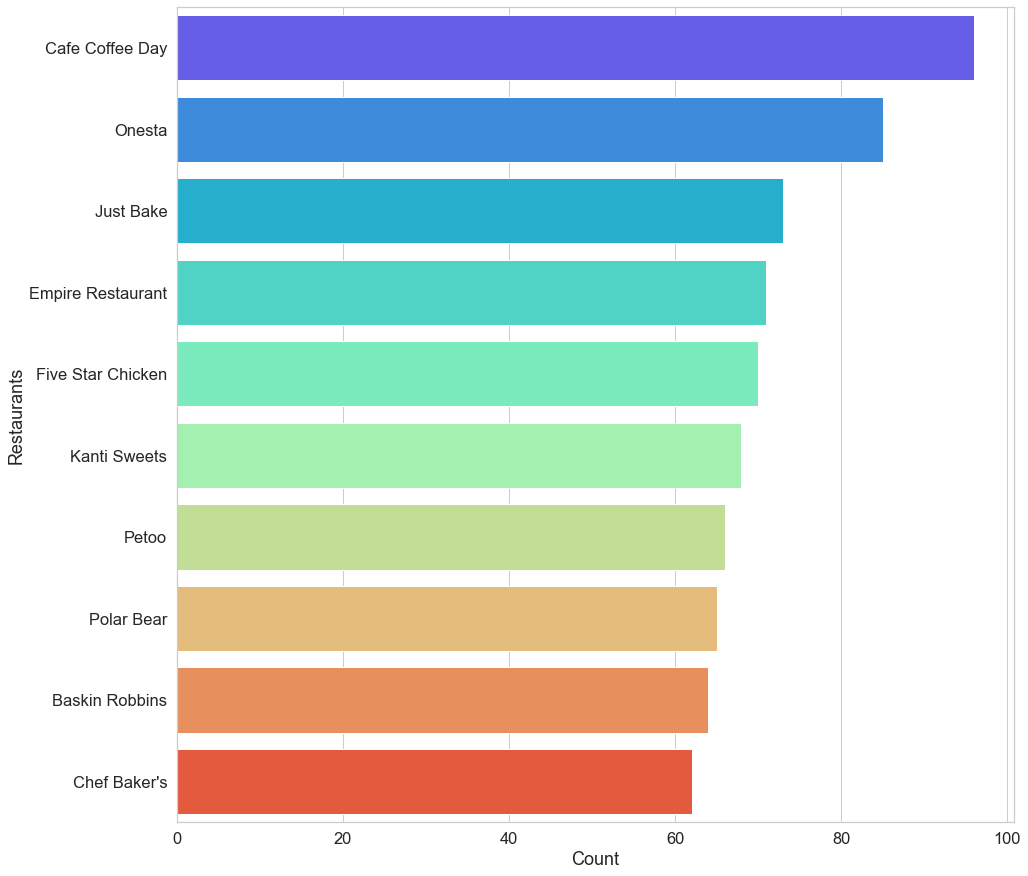

In [22]:

plt.figure(figsize=(15,15))
outlet_top=zomato_df.name.value_counts().nlargest(10)

sns.barplot(x = outlet_top, y=outlet_top.index, palette='rainbow')
plt.xlabel('Count')
plt.ylabel('Restaurants')

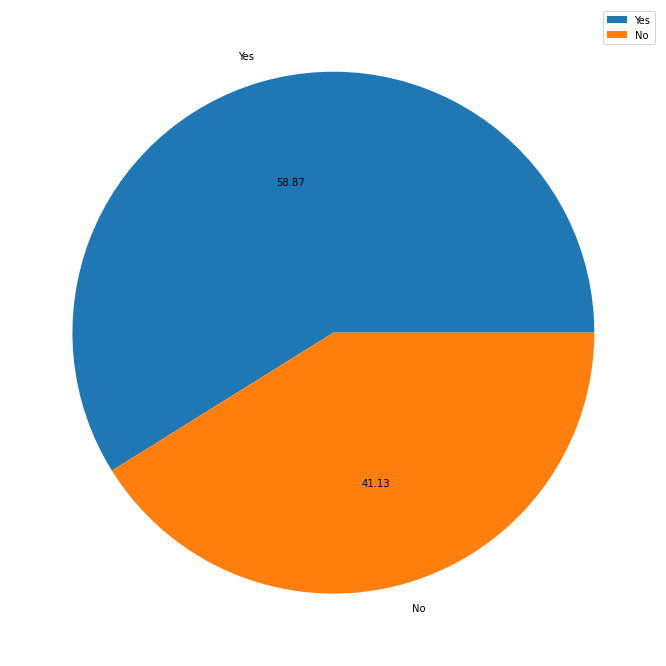

In [4]:
#b) Display accepting online orders vs not accepting online orders count % distribution

zomato_df.online_order.value_counts()
plt.figure(figsize = (12,12))
plt.pie(zomato_df.online_order.value_counts(), labels = zomato_df.online_order.unique(),autopct='%.2f')
plt.legend()
plt.show()

In [5]:
#c) Find the popular restaurant type in Bengaluru.
zomato_df.rest_type.value_counts()


Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

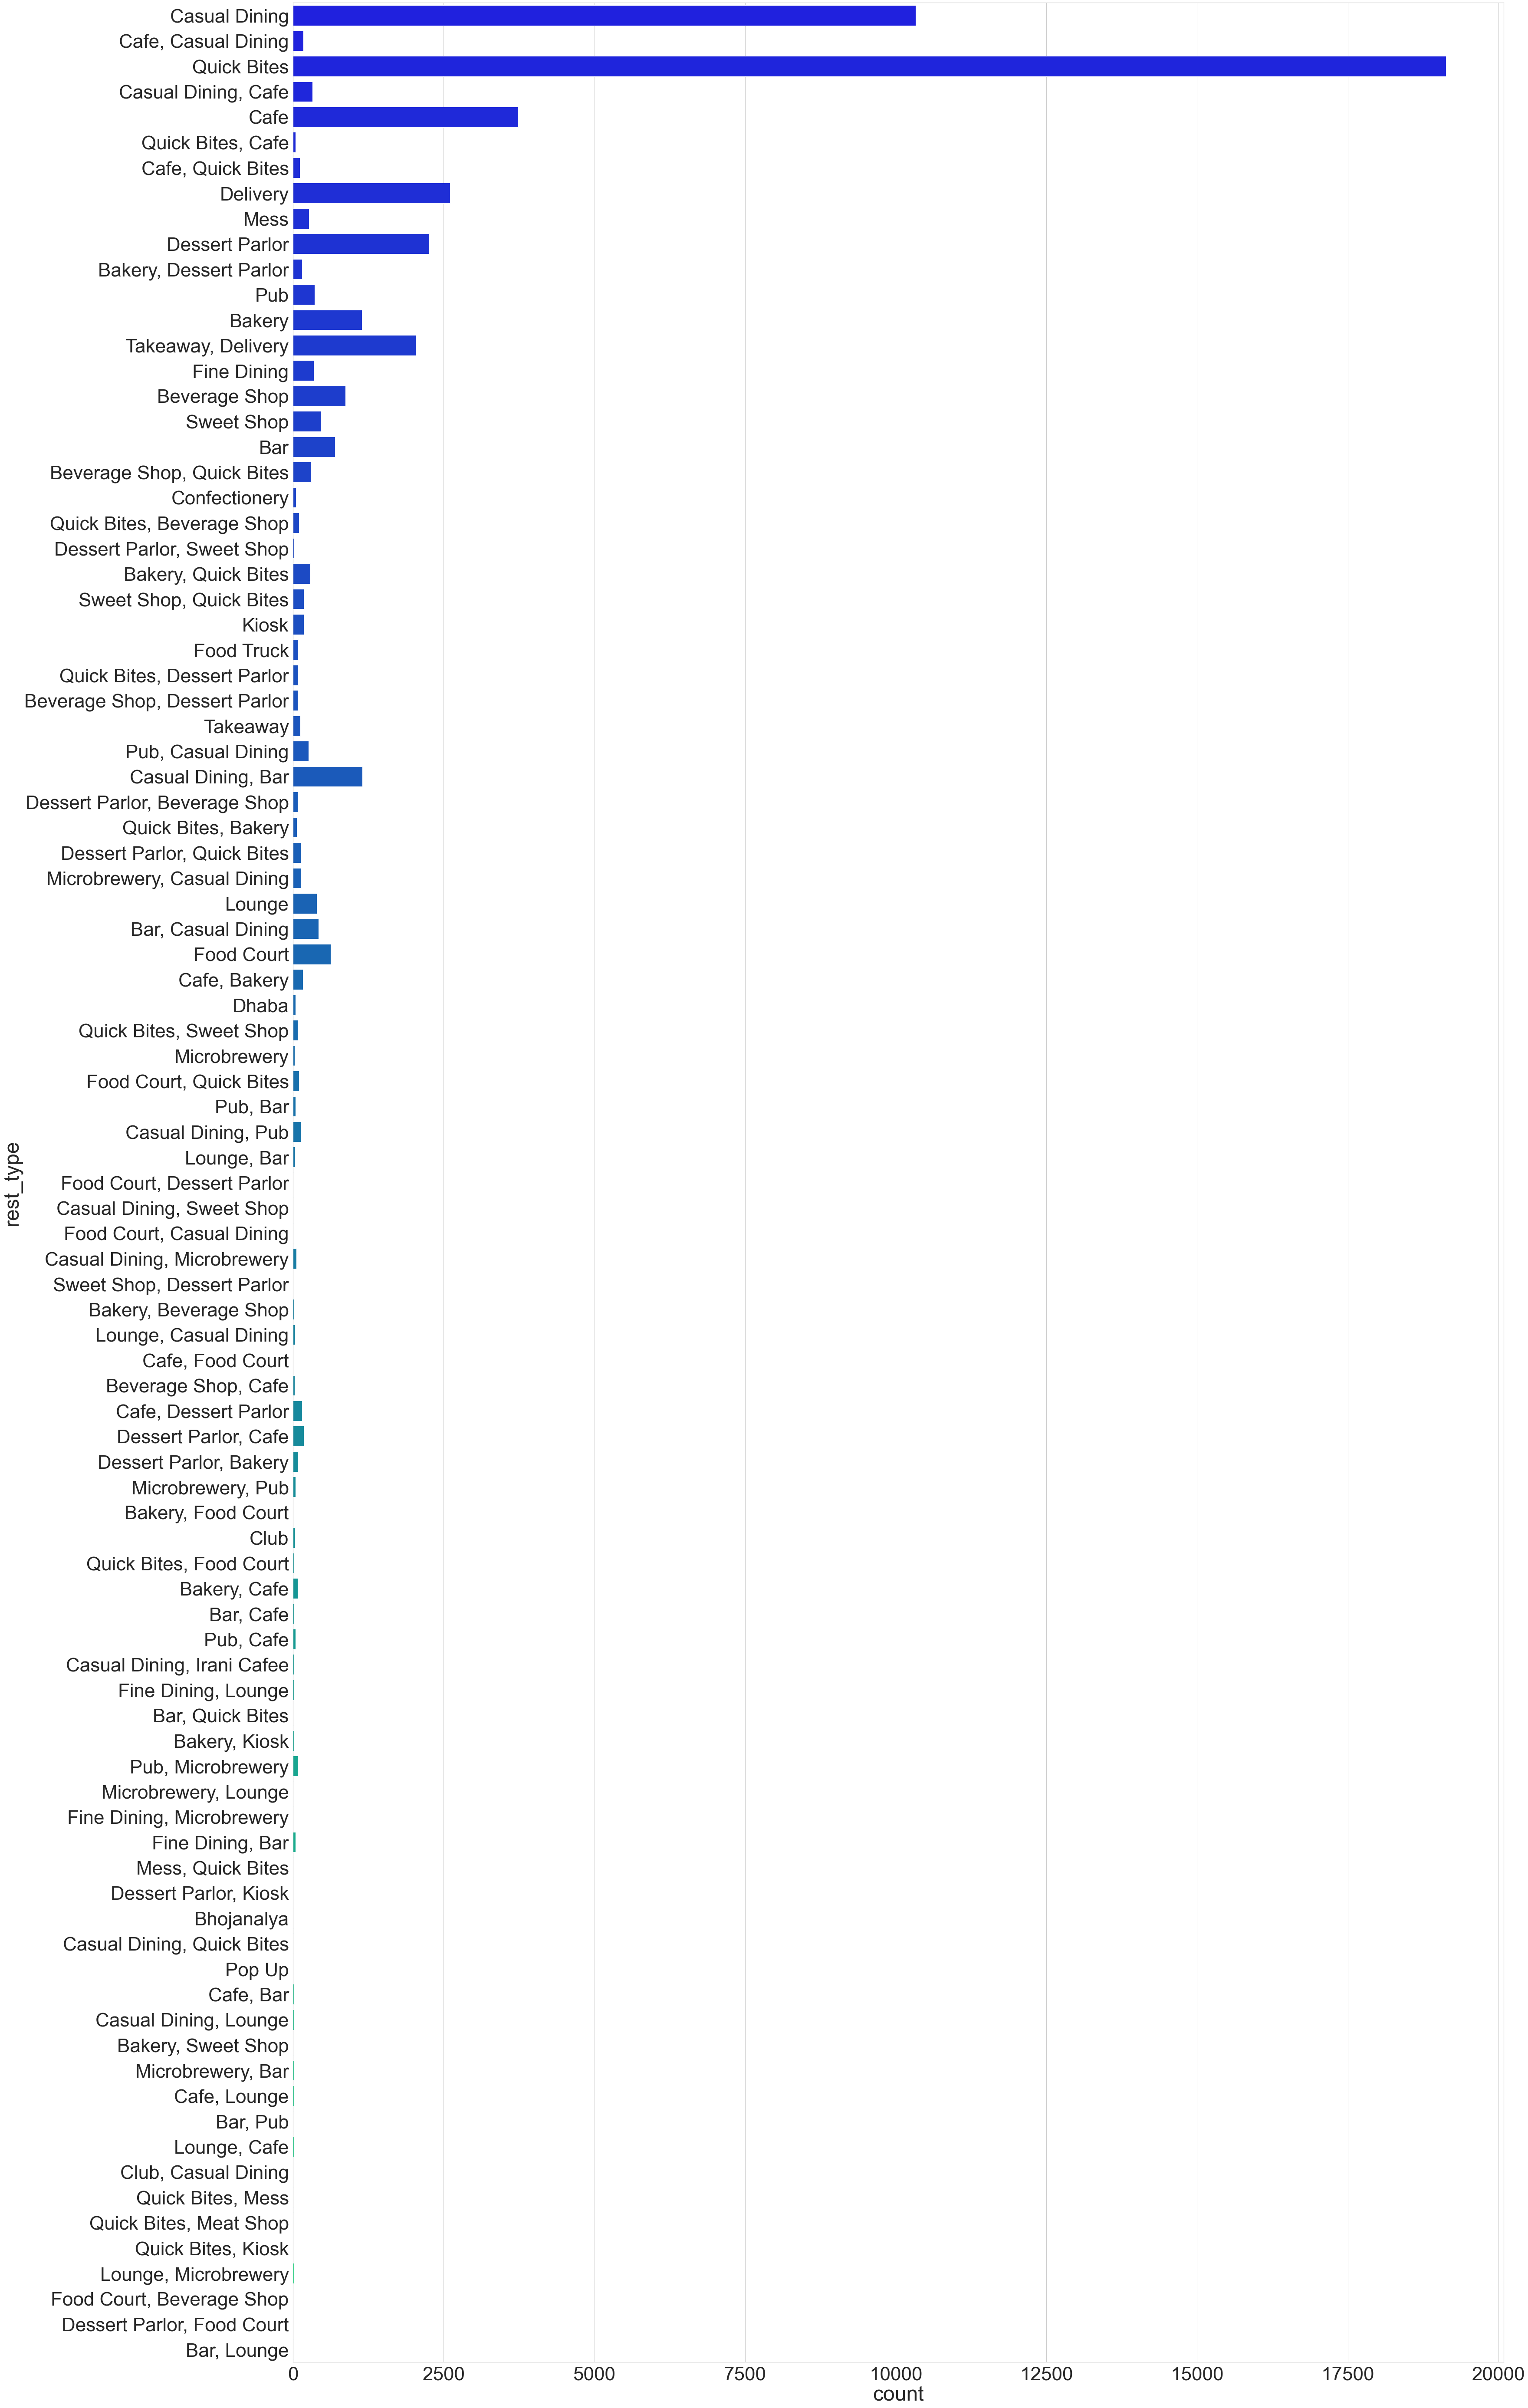

In [6]:
sns.set(font_scale=4)
sns.set_style('whitegrid')
plt.figure(figsize=(50, 100))
cp=sns.countplot(y="rest_type", data = zomato_df, palette='winter')

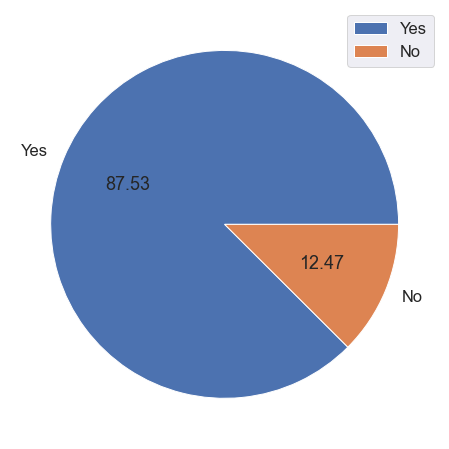

In [7]:
#d) Display accepting Table Booking vs Not accepting table booking count % distribution
sns.set(font_scale=1.5)
zomato_df.online_order.value_counts()
plt.figure(figsize = (8,8))
plt.pie(zomato_df.book_table.value_counts(), labels = zomato_df.book_table.unique(),autopct='%.2f')
plt.legend()
plt.show()

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Count'>

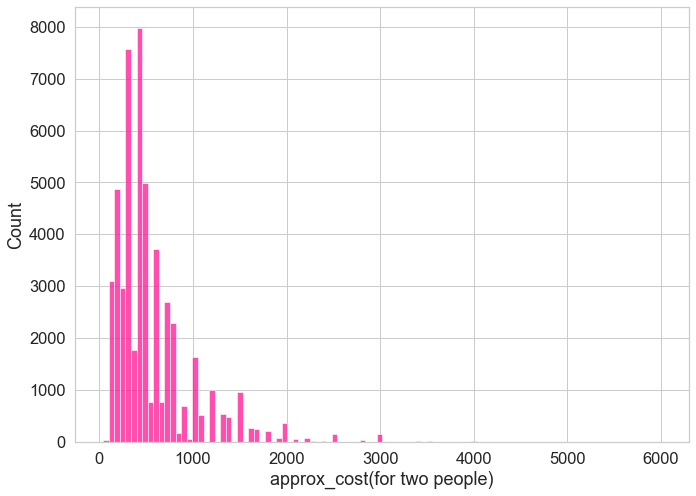

In [25]:
# e)Histogram and Box Plot of Approx Cost Distribution. Note: Replace ‘,’ from the values using replace(),
#   lambda function with replace()

plt.figure(figsize=(11,8))
sns.histplot(zomato_df['approx_cost(for two people)'], color = 'deeppink', bins=100)


<AxesSubplot:>

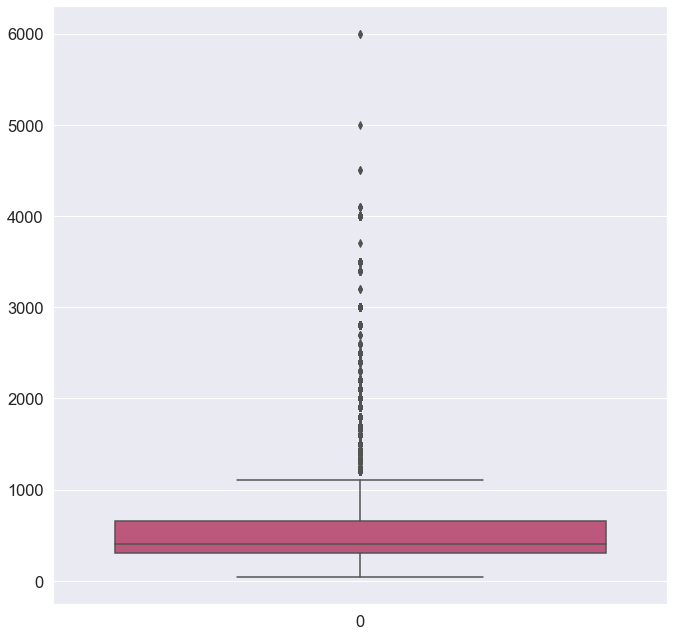

In [9]:
plt.figure(figsize=(11,11))
sns.boxplot(data=zomato_df['approx_cost(for two people)'],palette='plasma')

<AxesSubplot:xlabel='rate', ylabel='Count'>

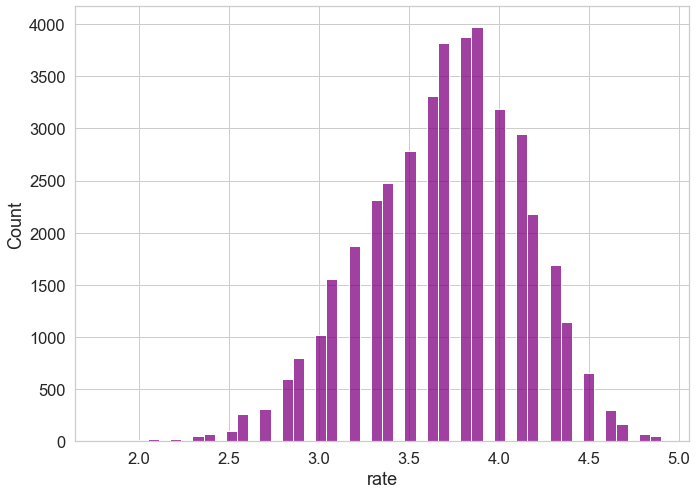

In [26]:
# f) Histogram and Box Plot of Restaurant Rating Distribution. Note: Replace ‘,’ from the values using
#    replace(), lambda function with replace()


plt.figure(figsize=(11,8))
sns.histplot(zomato_df['rate'], color = 'purple', bins=50)



<AxesSubplot:>

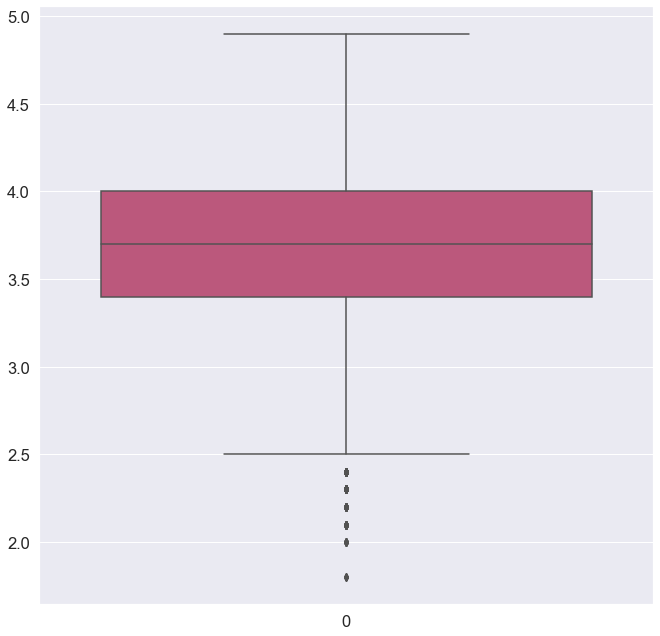

In [11]:
plt.figure(figsize=(11,11))
sns.boxplot(data=zomato_df['rate'],palette='plasma')

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

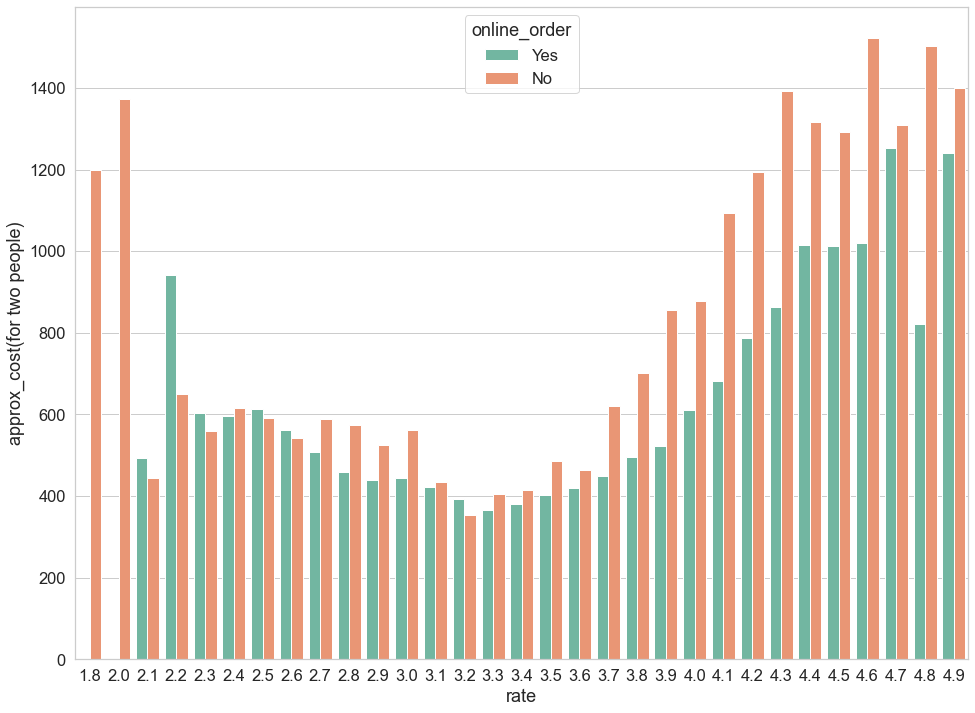

In [12]:
# g)Rate vs Approx Cost (for two people). Also categorise them into online_order available or not.


sns.set_style('whitegrid')
plt.figure(figsize=(16,12))
sns.barplot(x = "rate", y = "approx_cost(for two people)", data = zomato_df, ci = None, palette='Set2', hue='online_order', orient='v')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

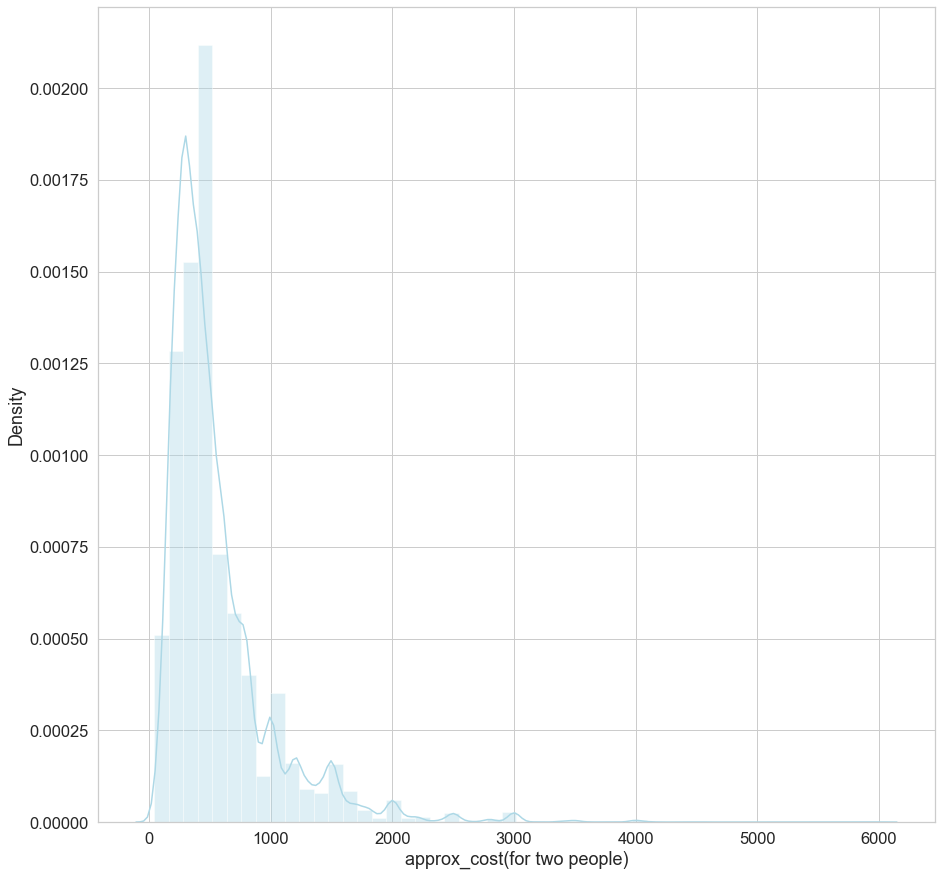

In [13]:
# h) Distribution of Approx Cost for two people. Is it skewed?

plt.figure(figsize=(15,15))
sns.distplot(zomato_df['approx_cost(for two people)'], color = 'lightblue')

#positive skewness

<AxesSubplot:xlabel='online_order', ylabel='votes'>

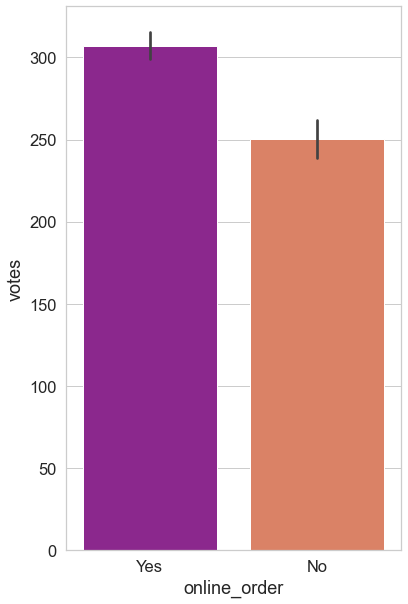

In [30]:
# i) Is there any difference b/w votes of restaurants accepting and not accepting online orders?



sns.set_style('whitegrid')
plt.figure(figsize=(6,10))
sns.barplot(x = "online_order", y = "votes", data = zomato_df, palette='plasma' ,s=100)

In [15]:
# j) Which are the Top 20 most common restaurant types in Bengaluru?

Text(0, 0.5, 'Types')

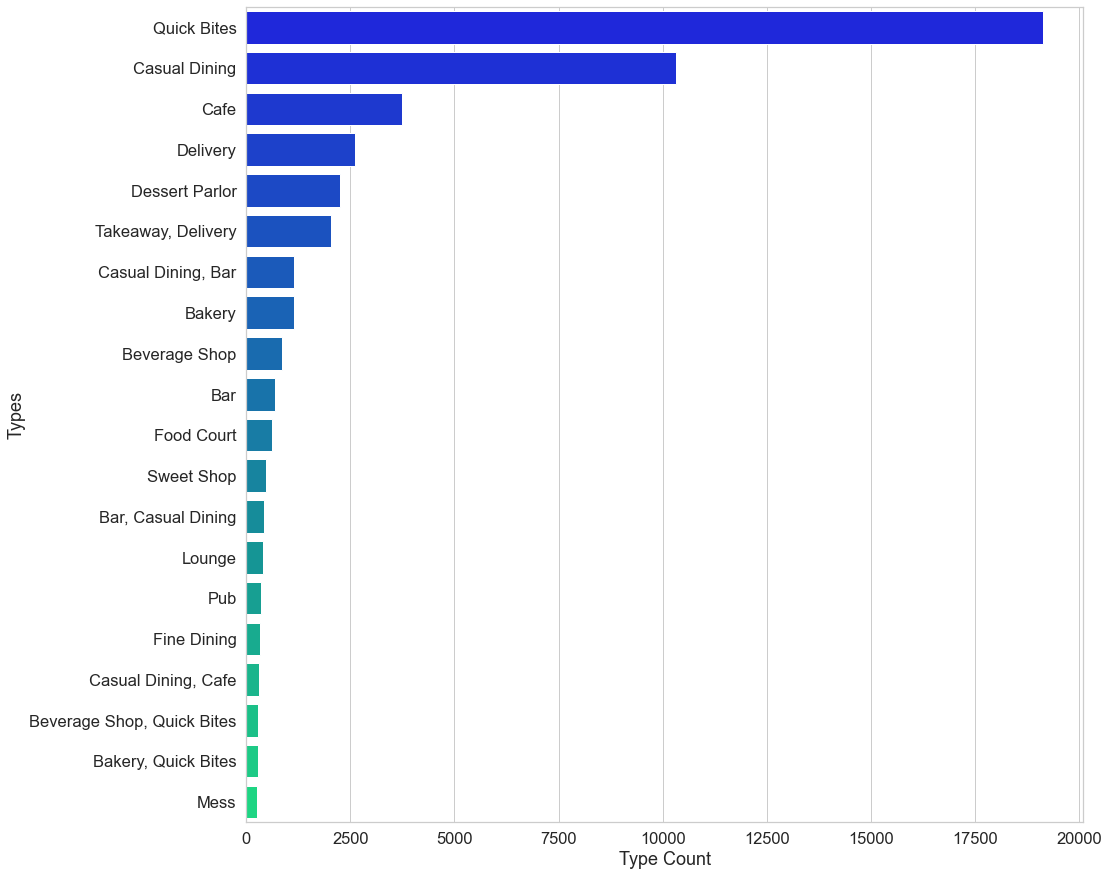

In [16]:

plt.figure(figsize=(15,15))
rest_type_top20=zomato_df.rest_type.value_counts().nlargest(20)

sns.barplot(x = rest_type_top20, y=rest_type_top20.index, palette='winter')
plt.xlabel('Type Count')
plt.ylabel('Types')

Text(0, 0.5, 'Locations with most restaurants')

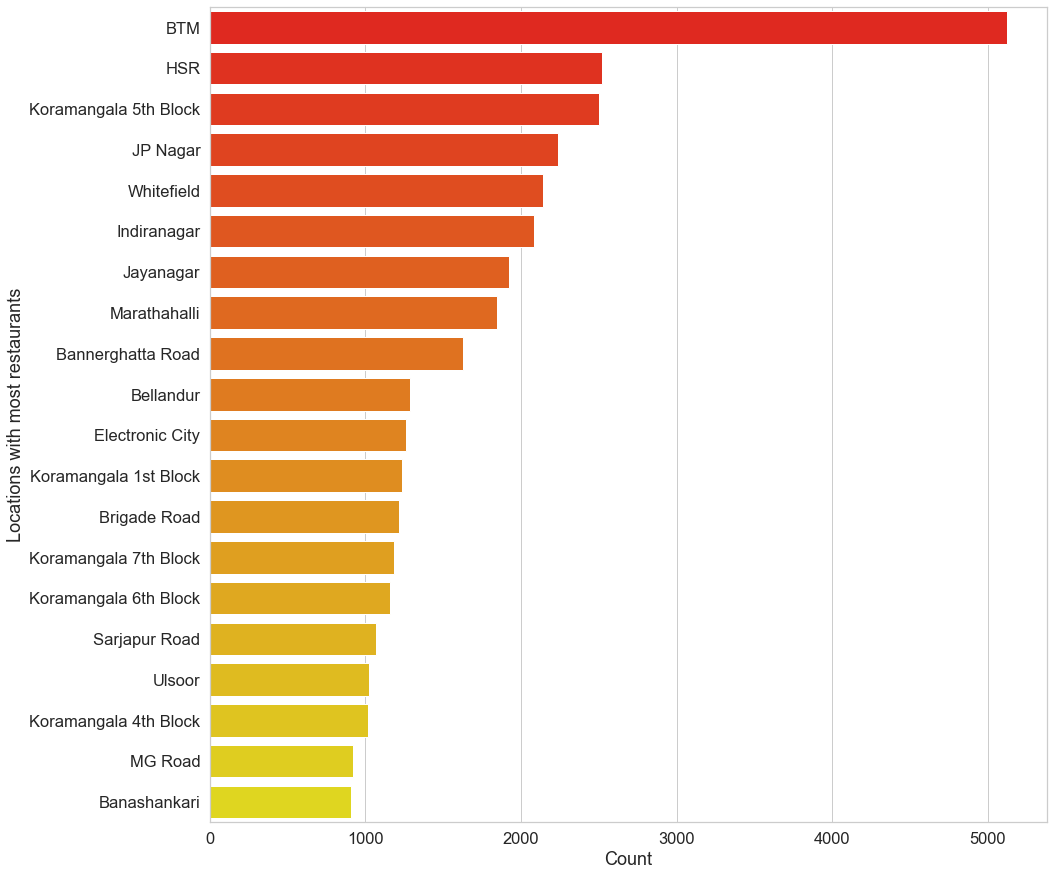

In [17]:
# k) Which are the Top 20 most common Locations with most Number of Restaurants?


plt.figure(figsize=(15,15))
locations_top20=zomato_df.location.value_counts()[:20]

sns.barplot(x = locations_top20, y=locations_top20.index, palette='autumn')
plt.xlabel('Count')
plt.ylabel('Locations with most restaurants')